In [6]:
import cv2
from  matplotlib import pyplot as plt
%matplotlib inline

cv2_imshow = lambda x:plt.imshow(x[:,:,::-1])
import numpy as np
import sys
sys.path.append("MyDepth")
from boilerplate import *
input_picture_directory = system_data_path/'5.跨场景单目深度估计/决赛数据/final_b'
input_picture_directory

PosixPath('/data/projects/depth/5.跨场景单目深度估计/决赛数据/final_b')

In [10]:
camera_matrix = np.array([[549.0869836743506, 0, 664.8310221457081], [0, 549.0393143358732, 368.30351397130175], [0, 0, 1]])
dist_coeffs = np.array([-0.037032730499053215, -9.331683195791314e-05, -0.0025427846701313096, 0.0005759176479469663])

(720, 1280, 3)


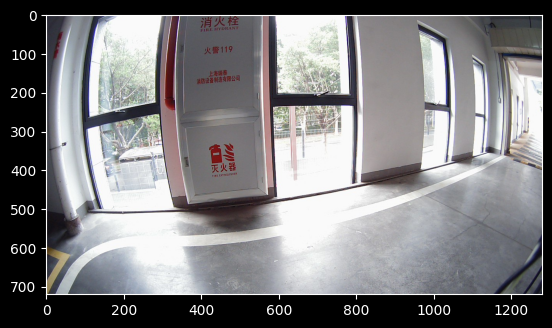

In [30]:
img = cv2.imread((input_picture_directory/'img_0000.jpg').as_posix())
print(img.shape)
cv2_imshow(img)

In [62]:
img.shape
# img.shape[1:-1:0]
wh = img.shape[-2:-4:-1]
wh
# img.shape[1:0:-1]

(1280, 720)

(720, 1280, 3)


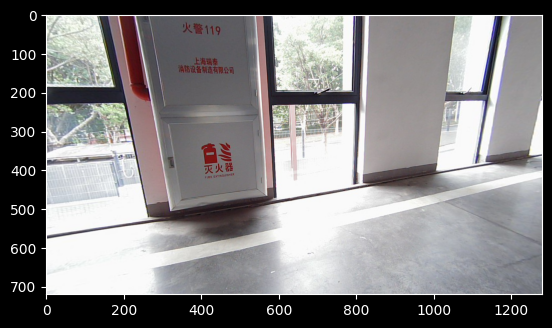

In [155]:
# 消除鱼眼
map1, map2 = cv2.fisheye.initUndistortRectifyMap(K=camera_matrix, D=dist_coeffs, R=np.eye(3), P=camera_matrix, 
                                                 size=img.shape[-2:-4:-1], 
                                                # (np.array(wh)*2.5).astype(int),
                                                # size=(np.array(wh)*3).astype(int),
                                                #  cv2.CV_16SC2
                                                # m1type=cv2.CV_32FC1
                                                m1type=cv2.CV_16SC2
                                                 )
undistorted_img = cv2.remap(img, map1, 
                            map2, 
                            # None, 
                            interpolation=cv2.INTER_LINEAR, 
                            borderMode=cv2.BORDER_CONSTANT)
print(undistorted_img.shape)
cv2_imshow(undistorted_img)

In [154]:
coordinates = np.zeros((wh[1], wh[0], 2), dtype=np.float32)
for i in range(coordinates.shape[0]):
    for j in range(coordinates.shape[1]):
        coordinates[i, j, :] = [i, j]
# coordinates

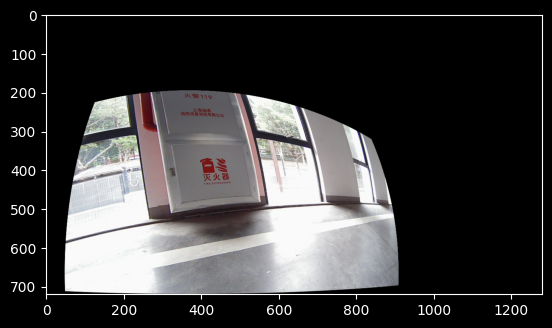

In [159]:
maps = cv2.fisheye.undistortPoints(coordinates, K=camera_matrix, D=dist_coeffs, R=np.eye(3), P=camera_matrix)
inv_map1, inv_map2 = maps[:, :, 1], maps[:, :, 0]
inv_map1, inv_map2 = cv2.convertMaps(inv_map1, inv_map2, dstmap1type=cv2.CV_16SC2)
distorted = cv2.remap(undistorted_img, inv_map1, inv_map2, interpolation=cv2.INTER_LINEAR, 
                            borderMode=cv2.BORDER_CONSTANT)
cv2_imshow(distorted)